<a href="https://colab.research.google.com/github/Haseena-24/ML-Project/blob/main/Google_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [42]:
data.describe()

,Open,High,Low,Close
count,1149.000000,1149.000000,1149.000000,1149.000000
mean,531.604517,535.816449,526.879608,674.775527
std,158.412156,159.593385,157.008123,112.582696
min,279.120000,281.210000,277.220000,491.200000
25%,391.560000,394.700000,388.230000,571.580000
50%,536.350000,539.600000,531.540000,673.690000
75%,689.980000,698.200000,683.650000,761.680000
max,816.680000,816.680000,805.140000,922.160000


In [43]:
data.isnull()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1253,False,False,False,False,False,False
1254,False,False,False,False,False,False
1255,False,False,False,False,False,False
1256,False,False,False,False,False,False


In [5]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [34]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import seaborn as sns

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [11]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 21s - loss: 0.0338 - 21s/epoch - 604ms/step
Epoch 2/20
35/35 - 10s - loss: 0.0109 - 10s/epoch - 274ms/step
Epoch 3/20
35/35 - 7s - loss: 0.0108 - 7s/epoch - 208ms/step
Epoch 4/20
35/35 - 9s - loss: 0.0090 - 9s/epoch - 250ms/step
Epoch 5/20
35/35 - 8s - loss: 0.0074 - 8s/epoch - 238ms/step
Epoch 6/20
35/35 - 8s - loss: 0.0073 - 8s/epoch - 235ms/step
Epoch 7/20
35/35 - 7s - loss: 0.0071 - 7s/epoch - 207ms/step
Epoch 8/20
35/35 - 7s - loss: 0.0073 - 7s/epoch - 207ms/step
Epoch 9/20
35/35 - 7s - loss: 0.0062 - 7s/epoch - 204ms/step
Epoch 10/20
35/35 - 7s - loss: 0.0063 - 7s/epoch - 209ms/step
Epoch 11/20
35/35 - 7s - loss: 0.0058 - 7s/epoch - 201ms/step
Epoch 12/20
35/35 - 7s - loss: 0.0056 - 7s/epoch - 208ms/step
Epoch 13/20
35/35 - 7s - loss: 0.0057 - 7s/epoch - 200ms/step
Epoch 14/20
35/35 - 7s - loss: 0.0075 - 7s/epoch - 208ms/step
Epoch 15/20
35/35 - 8s - loss: 0.0052 - 8s/epoch - 224ms/step
Epoch 16/20
35/35 - 7s - loss: 0.0049 - 7s/epoch - 212ms/step
Epoch 17/20
3

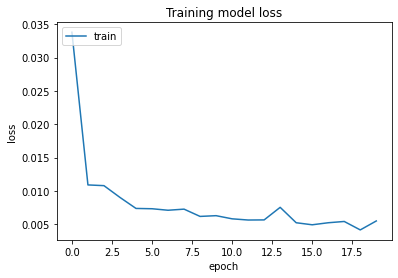

In [12]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [13]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [14]:
y_pred = model.predict(X_test)
y_pred

array([[1.1738333],
       [1.1760073],
       [1.1857868],
       [1.200905 ],
       [1.2135986],
       [1.2146717],
       [1.2039752],
       [1.1881747],
       [1.1773235],
       [1.1738545],
       [1.1678267],
       [1.1578971],
       [1.1486039],
       [1.1398757],
       [1.1373243],
       [1.140708 ],
       [1.1560847],
       [1.1810333],
       [1.2100899],
       [1.2392875],
       [1.2525826],
       [1.2514086],
       [1.2347387],
       [1.2093421],
       [1.1854461],
       [1.1709615],
       [1.1666405],
       [1.165683 ],
       [1.1593308],
       [1.1494601],
       [1.1382694],
       [1.125541 ],
       [1.1069791],
       [1.0840062],
       [1.0735635],
       [1.0807276],
       [1.0996982],
       [1.1221797],
       [1.1439046],
       [1.1557604],
       [1.167214 ],
       [1.180812 ],
       [1.1966342],
       [1.2116836],
       [1.2223597],
       [1.2247512],
       [1.2171222],
       [1.2094386],
       [1.2069565],
       [1.2116495],


In [15]:
predicted_price = sc.inverse_transform(y_pred)

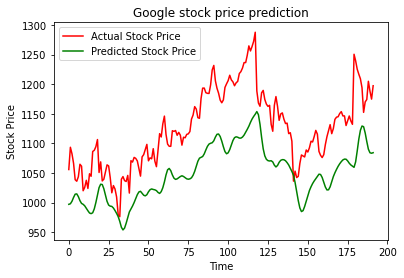

In [16]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

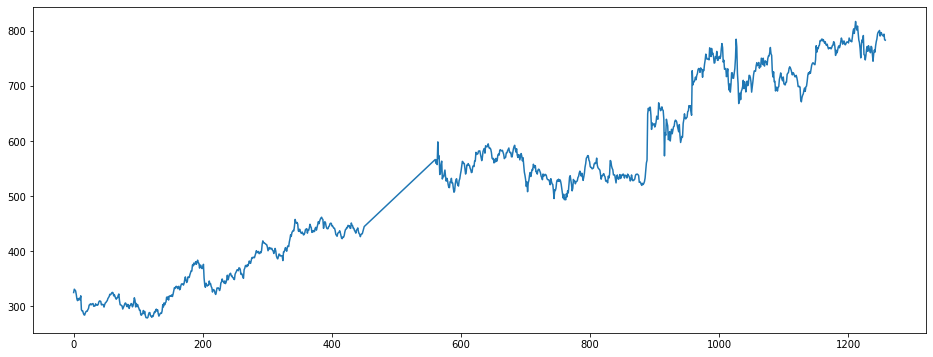

In [17]:
data['Open'].plot(figsize=(16,6))

{'whiskers': [<matplotlib.lines.Line2D at 0x7f67a8985890>,
 'caps': [<matplotlib.lines.Line2D at 0x7f67a8836390>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f67a8f94450>],
 'medians': [<matplotlib.lines.Line2D at 0x7f67a8836e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f67a883b3d0>],
 'means': []}

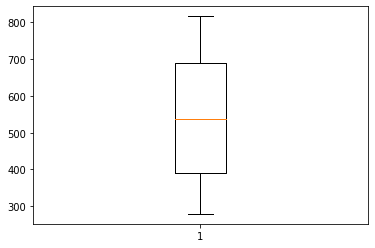

In [21]:
plt.boxplot(data["Open"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f67a8782d10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f67a8786810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f67a8782990>],
 'medians': [<matplotlib.lines.Line2D at 0x7f67a878e2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f67a878e850>],
 'means': []}

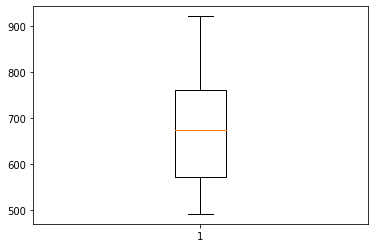

In [23]:
plt.boxplot(data["Close"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f67a863f4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f67a863ff90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f67a863f150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f67a8645a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f67a8645fd0>],
 'means': []}

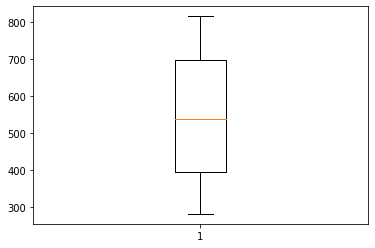

In [25]:
plt.boxplot(data["High"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f67a85aac50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f67a85b0750>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f67a85aa8d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f67a85b5210>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f67a85b5790>],
 'means': []}

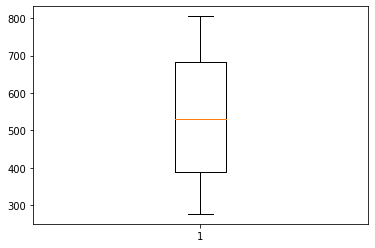

In [26]:
plt.boxplot(data["Low"])

(array([170., 108., 117.,  58., 190., 140.,  53.,  71., 140., 102.]),
 array([279.12 , 332.876, 386.632, 440.388, 494.144, 547.9  , 601.656,
        655.412, 709.168, 762.924, 816.68 ]),
 <a list of 10 Patch objects>)

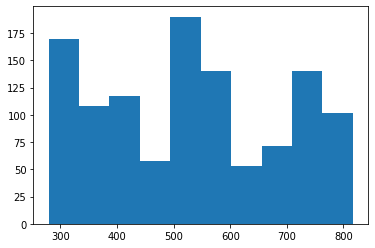

In [28]:
plt.hist(data["Open"])

(array([114., 203., 135., 104., 114., 150., 159.,  52.,  58.,  60.]),
 array([491.2  , 534.296, 577.392, 620.488, 663.584, 706.68 , 749.776,
        792.872, 835.968, 879.064, 922.16 ]),
 <a list of 10 Patch objects>)

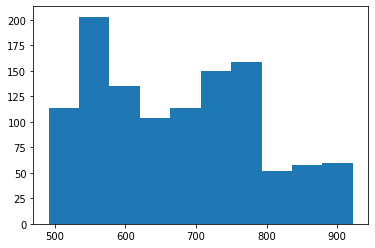

In [30]:
plt.hist(data["Close"])

(array([169., 110., 108.,  66., 185., 146.,  51.,  62., 142., 110.]),
 array([277.22 , 330.012, 382.804, 435.596, 488.388, 541.18 , 593.972,
        646.764, 699.556, 752.348, 805.14 ]),
 <a list of 10 Patch objects>)

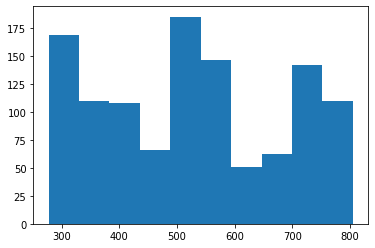

In [31]:
plt.hist(data["Low"])

(array([167., 109., 113.,  63., 181., 147.,  49.,  58., 144., 118.]),
 array([281.21 , 334.757, 388.304, 441.851, 495.398, 548.945, 602.492,
        656.039, 709.586, 763.133, 816.68 ]),
 <a list of 10 Patch objects>)

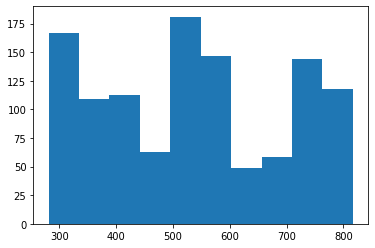

In [32]:
plt.hist(data["High"])

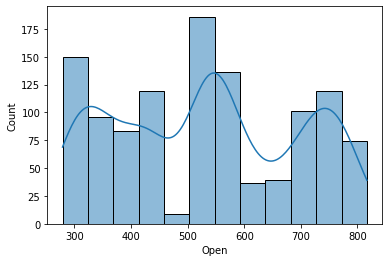

In [36]:
sns.histplot(data.Open,kde=True)

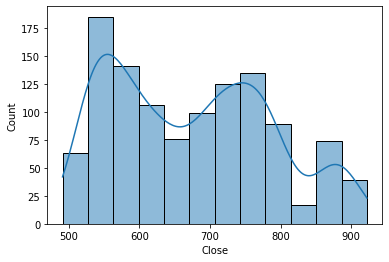

In [40]:
sns.histplot(data.Close,kde=True)

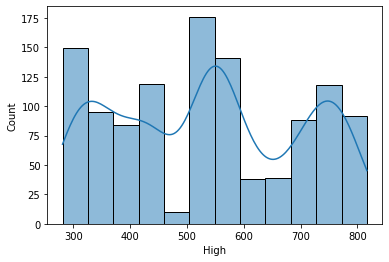

In [41]:
sns.histplot(data.High,kde=True)